#Performing PCA on MNIST dataset

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv("mnist_train.csv")

In [64]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Saving the label into different variable "Lab".

In [65]:
Lab=df['label']

In [66]:
# Drop the label feature and store the pixel data in dfnew.
dfnew=df.drop("label",axis=1)

In [67]:
dfnew.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data=dfnew.head(15000)
labels=Lab.head(15000)
print(data.shape)

(15000, 784)


In [69]:
#To print shape of the dataframe
print(df.shape) #total datframe
print(dfnew.shape) #dataframe without label
print(Lab.shape)         #dataframe holding label

(42000, 785)
(42000, 784)
(42000,)


In [70]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
sample_data = standardized_data

In [71]:
#PCA Scikit Learn
from sklearn import decomposition
pca=decomposition.PCA()
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data=pca.fit_transform(sample_data)

In [72]:
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


In [73]:
#attching the label for each 2-d Data Points
pca_data = np.vstack((pca_data.T, labels)).T

In [74]:
pca_data

array([[-5.0435952 , -5.55932256,  1.        ],
       [19.30524018,  6.19284271,  0.        ],
       [-7.67877008, -1.90946591,  1.        ],
       ...,
       [-1.50728462, -2.14808153,  8.        ],
       [-6.53728016,  3.20475764,  9.        ],
       [-1.25628043, -6.87915857,  6.        ]])

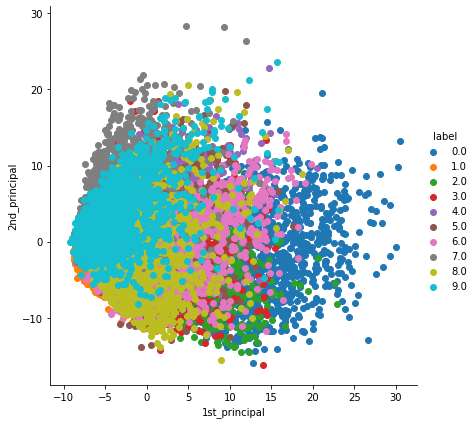

In [76]:
#creating a new data frame which help us in plotting the result data.
import seaborn as sn
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Conclusion:
PCA visualization of MNIST dataset is Ok not very great. Its useful in the sense we can comment here that point like 0 and 9 are well seperated . we can notice lots of mixups hence,studying some more visualization and dimension reduction techniques will be beneficial.